# Step 1: Load and Understand the Dataset


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
housing_or = pd.read_csv('housing.csv')

# Check dataset info
print(housing_or.info())

# Display the first 5 rows to get a feel of the data
print(housing_or.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.8

# Step 2: Handle Missing Values

In [38]:
# Check for missing values
print(housing_or.isnull().sum())


# delete the row of missing value
housing = housing_or.dropna()
print()

# Verify if there are any more missing values
print(housing.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Step 3: Descriptive Statistics

In [30]:
# Show descriptive statistics
print(housing.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

# Step 4: Visualizations

## Histogram of median_house_value



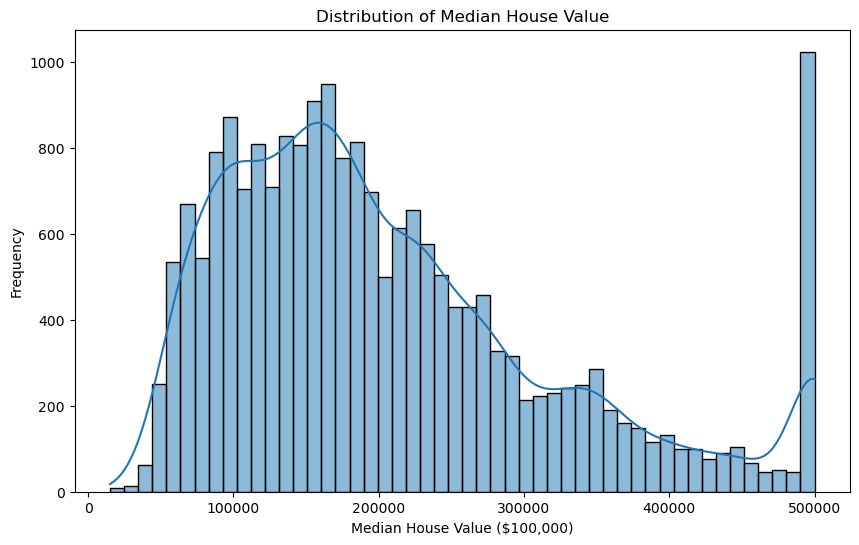

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for median_house_value
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Frequency')
plt.show()


## Scatter Plot Between median_house_value and median_income

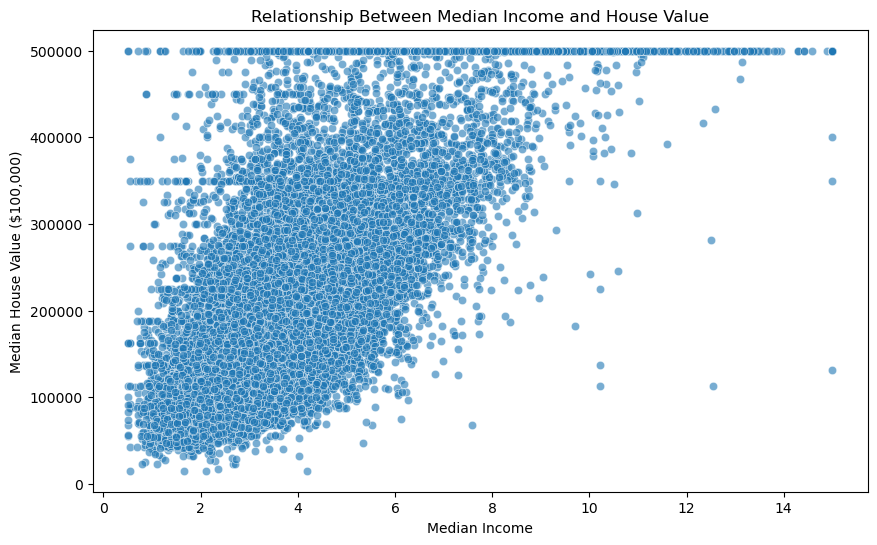

In [17]:
# Scatter plot between median_house_value and median_income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.6)
plt.title('Relationship Between Median Income and House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ($100,000)')
plt.show()


## Box Plot for ocean_proximity and median_house_value

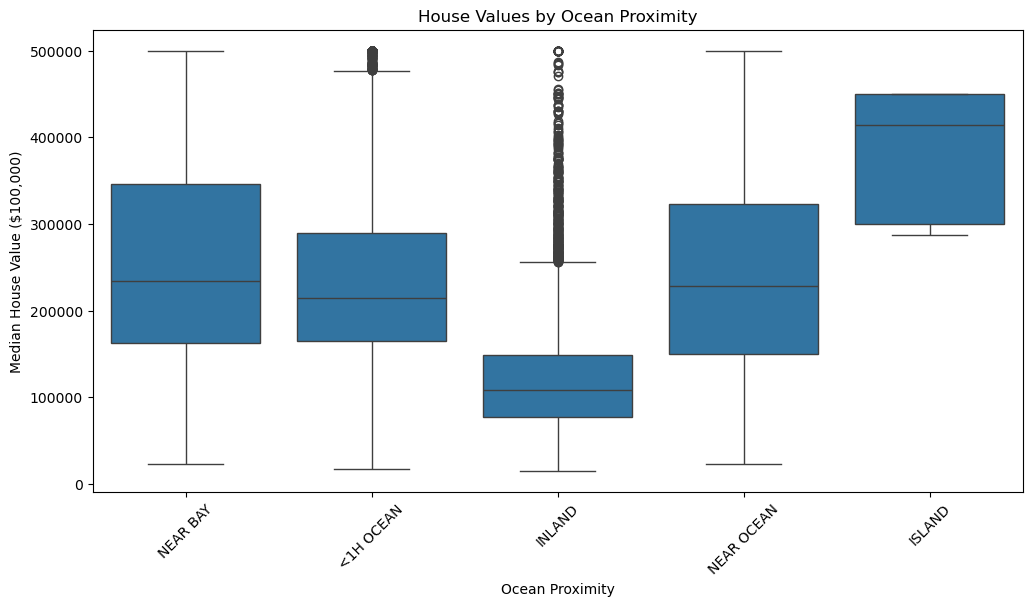

In [19]:
# Box plot for ocean_proximity and median_house_value
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('House Values by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value ($100,000)')
plt.xticks(rotation=45)
plt.show()


### We can also explore how proximity to the ocean differ by house age

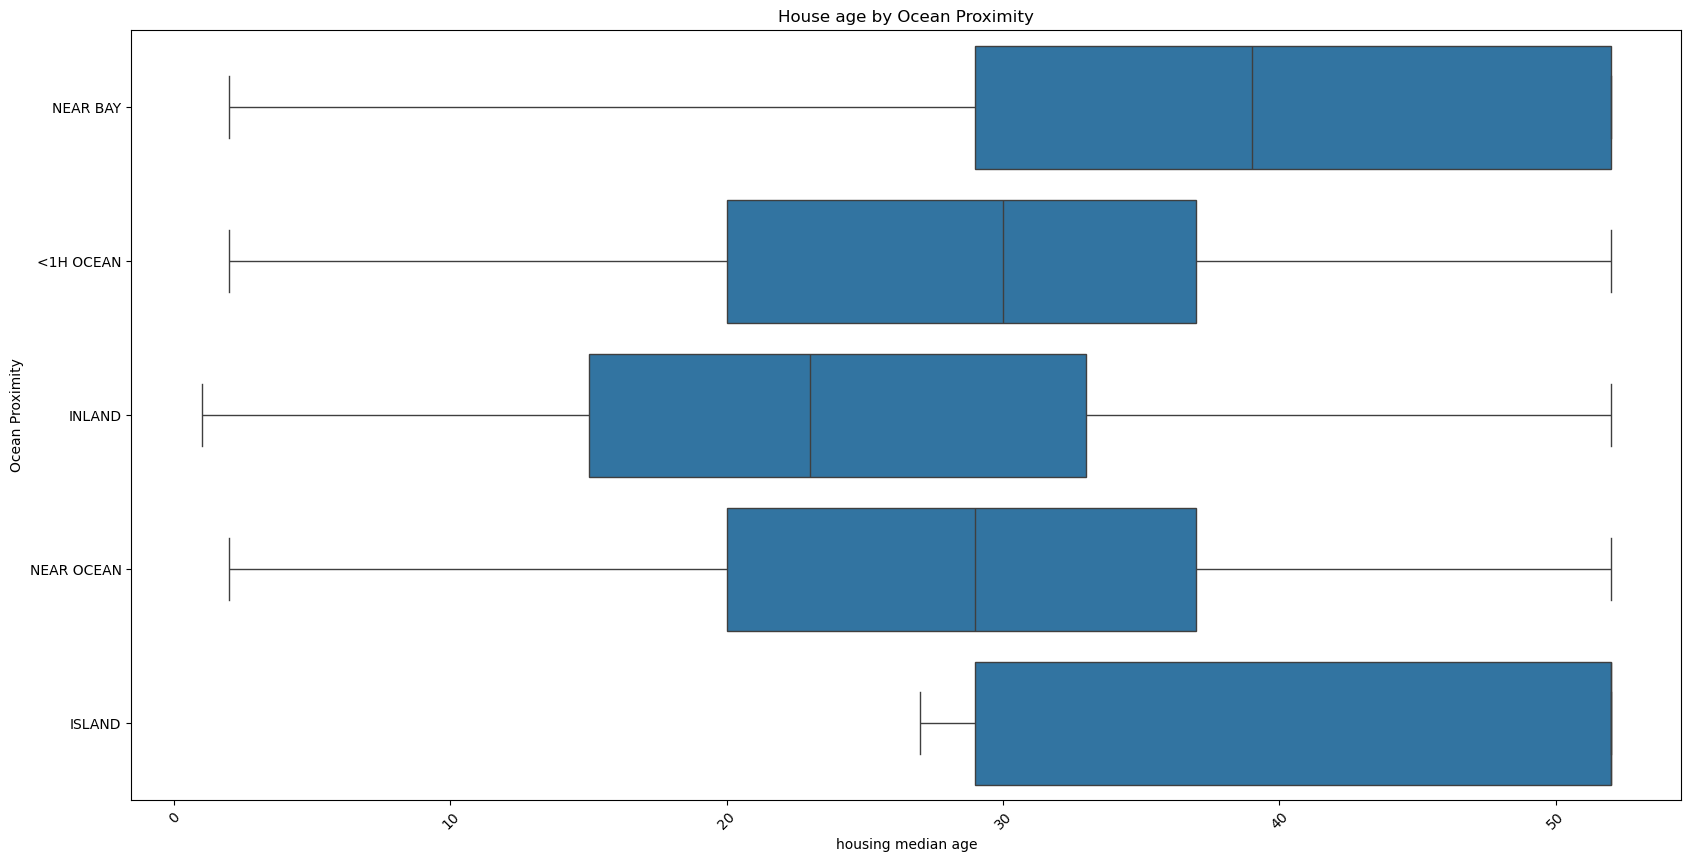

In [82]:
# Box plot for ocean_proximity and median_house_value
plt.figure(figsize=(20, 10))
sns.boxplot(x='housing_median_age', y='ocean_proximity', data=housing)
plt.title('House age by Ocean Proximity')
plt.xlabel('housing median age')
plt.ylabel('Ocean Proximity')
plt.xticks(rotation=45)
plt.show()


## Step 5: Geographical Distribution

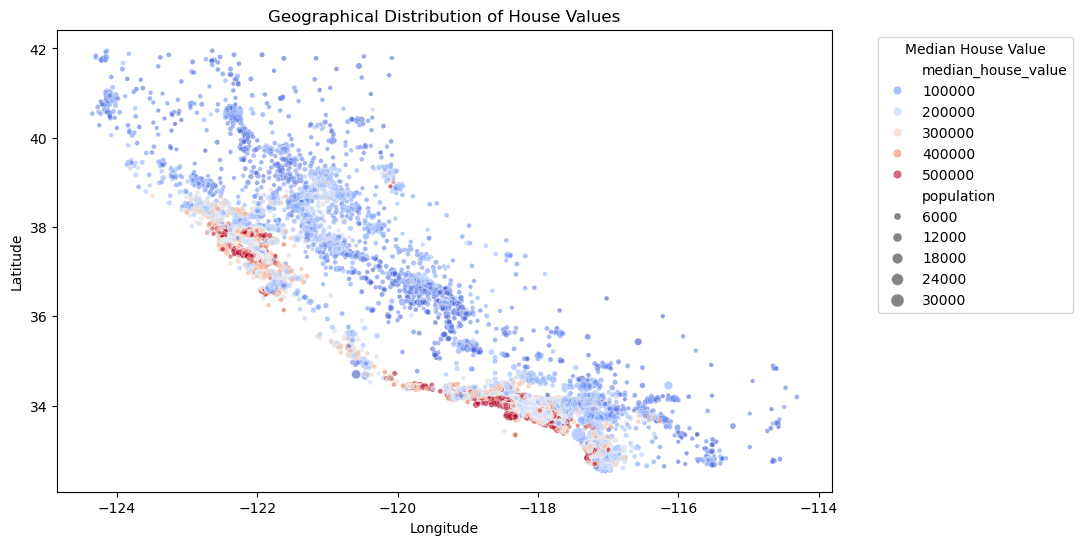

In [26]:
# Geographical distribution of house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', data=housing, size='population', sizes=(10, 100), alpha=0.6)
plt.title('Geographical Distribution of House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Step 6: Correlation Between Numeric Variables

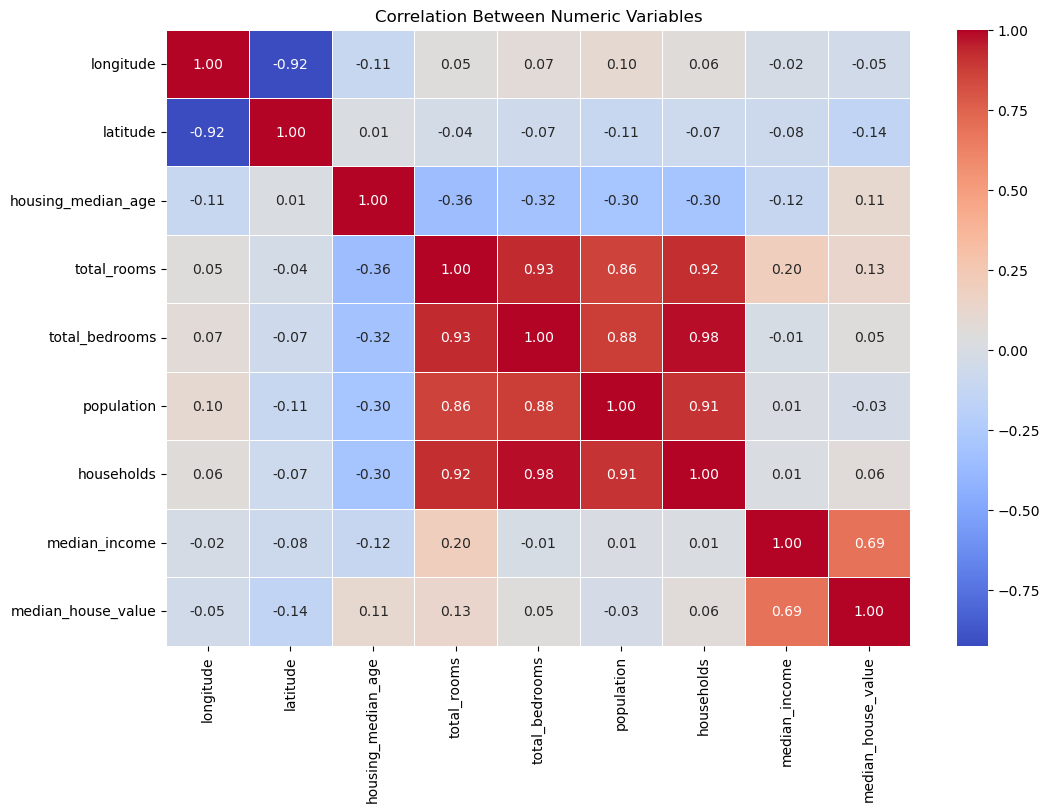

In [48]:
# Select only numeric columns for correlation calculation
numeric_columns = housing.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = housing[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numeric Variables')
plt.show()
